# Low Rank approximation

In [2]:
import numpy as np

In [3]:
U = np.asarray([[-1, 1, 0, 0.5],
                [-0.5, 0, -1, -0.5],
                [0, -0.5, 0, 1],
                [-0.5, 0, 1, -0.5]])

U, U.shape

(array([[-1. ,  1. ,  0. ,  0.5],
        [-0.5,  0. , -1. , -0.5],
        [ 0. , -0.5,  0. ,  1. ],
        [-0.5,  0. ,  1. , -0.5]]), (4, 4))

In [4]:
V = np.asarray([[-0.5, 0.5, -1],
                [-1, -1, 0],
                [-0.5, 0.5, 1]])

V, V.shape

(array([[-0.5,  0.5, -1. ],
        [-1. , -1. ,  0. ],
        [-0.5,  0.5,  1. ]]), (3, 3))

In [5]:
sig = np.asarray([2, 1.5, 1])

In [6]:
S = np.eye(U.shape[0],V.shape[0]) * sig

S, S.shape

(array([[2. , 0. , 0. ],
        [0. , 1.5, 0. ],
        [0. , 0. , 1. ],
        [0. , 0. , 0. ]]), (4, 3))

In [7]:
np.linalg.matrix_rank(S)

3

In [8]:
#Method 1
U[:,:1] @ S[:1,:1] @ V[:,:1].T

array([[1. , 2. , 1. ],
       [0.5, 1. , 0.5],
       [0. , 0. , 0. ],
       [0.5, 1. , 0.5]])

In [9]:
#Method 2
np.outer(U[:, 0], V.T[0]) * sig[0]

array([[ 1. ,  2. ,  1. ],
       [ 0.5,  1. ,  0.5],
       [-0. , -0. , -0. ],
       [ 0.5,  1. ,  0.5]])

In [ ]:
R = 1
mask = np.zeros((U.shape[0],V.shape[0]))
mask[:R, :R] = 1
mask

array([[1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
#Method 3
((U @ (S * mask)) @ V.T)

array([[1. , 2. , 1. ],
       [0.5, 1. , 0.5],
       [0. , 0. , 0. ],
       [0.5, 1. , 0.5]])

In [ ]:
(U @ S @ V.T)

array([[ 1.75 ,  0.5  ,  1.75 ],
       [ 1.5  ,  1.   , -0.5  ],
       [-0.375,  0.75 , -0.375],
       [-0.5  ,  1.   ,  1.5  ]])

# Page rank

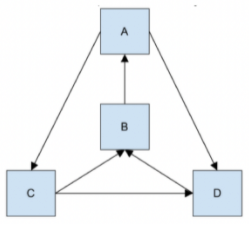

In [29]:
# Adjacency matrix
A = np.asarray([[0, 0, 1, 1],
                [1, 0, 0, 1],
                [0, 1, 0, 1],
                [0, 1, 0, 0]])

A, A.shape

(array([[0, 0, 1, 1],
        [1, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 1, 0, 0]]), (4, 4))

In [30]:
alpha = 0.15
N = A.shape[0]

In [31]:
P = ((A/A.sum(-1).reshape(-1,1)) * (1-alpha)) + alpha/N

In [32]:
P, P.shape

(array([[0.0375, 0.0375, 0.4625, 0.4625],
        [0.4625, 0.0375, 0.0375, 0.4625],
        [0.0375, 0.4625, 0.0375, 0.4625],
        [0.0375, 0.8875, 0.0375, 0.0375]]), (4, 4))

In [33]:
P = np.nan_to_num(P, nan=1/N)
P

array([[0.0375, 0.0375, 0.4625, 0.4625],
       [0.4625, 0.0375, 0.0375, 0.4625],
       [0.0375, 0.4625, 0.0375, 0.4625],
       [0.0375, 0.8875, 0.0375, 0.0375]])

In [34]:
P.sum(-1), P.sum(0)

(array([1., 1., 1., 1.]), array([0.575, 1.425, 0.575, 1.425]))

In [35]:
A = np.eye(N)[0]
for i in range(40):
    A = A @ P
    print(i, A)

0 [0.0375 0.0375 0.4625 0.4625]
1 [0.0534375 0.6271875 0.0534375 0.2659375]
2 [0.30405469 0.28625781 0.06021094 0.34947656]
3 [0.15915957 0.36014473 0.16672324 0.31397246]
4 [0.19056151 0.37523397 0.10514282 0.3290617 ]
5 [0.19697444 0.36188815 0.11848864 0.32264878]
6 [0.19130246 0.36210913 0.12121414 0.32537427]
7 [0.19139638 0.36558414 0.11880355 0.32421594]
8 [0.19287326 0.36357505 0.11884346 0.32470823]
9 [0.1920194  0.36401046 0.11947113 0.324499  ]
10 [0.19220445 0.36409939 0.11910824 0.32458792]
11 [0.19224224 0.36402074 0.11918689 0.32455013]
12 [0.19220881 0.36402204 0.11920295 0.32456619]
13 [0.19220937 0.36404252 0.11918875 0.32455937]
14 [0.19221807 0.36403068 0.11918898 0.32456227]
15 [0.19221304 0.36403325 0.11919268 0.32456104]
16 [0.19221413 0.36403377 0.11919054 0.32456156]
17 [0.19221435 0.36403331 0.119191   0.32456134]
18 [0.19221416 0.36403331 0.1191911  0.32456143]
19 [0.19221416 0.36403343 0.11919102 0.32456139]
20 [0.19221421 0.36403336 0.11919102 0.32456141]
2

In [ ]:
# [0.29721762 0.30554233 0.16380983 0.23343022]
# [0.20618557 0.20618557 0.20618557 0.3814433 ]